# EDA on Zomato Dataset Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
dataset="G:\Data science\Datasets\Zomatodataset\zomato.csv"
df1=pd.read_csv(dataset,encoding='latin-1')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_c=pd.read_excel("G:\Data science\Datasets\Zomatodataset\Country-Code.xlsx")
df_c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
df=pd.merge(df1,df_c)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [5]:
#examining columns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [6]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#statistical characteristics
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


In [9]:
#finding missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [10]:
#filling missing values
df.fillna("Not Specified")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [11]:
# countries providing service
df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [12]:
df.Country.value_counts(normalize=True)*100

India             90.587373
United States      4.544027
United Kingdom     0.837609
Brazil             0.628206
UAE                0.628206
South Africa       0.628206
New Zealand        0.418804
Turkey             0.355984
Australia          0.251283
Phillipines        0.230342
Indonesia          0.219872
Singapore          0.209402
Qatar              0.209402
Sri Lanka          0.209402
Canada             0.041880
Name: Country, dtype: float64

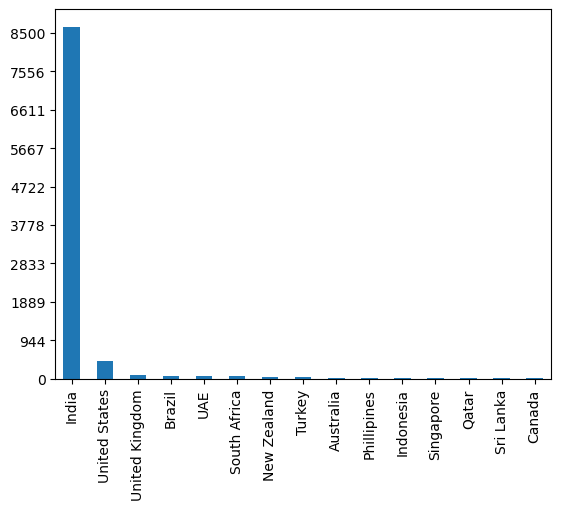

In [13]:
df.Country.value_counts().plot(kind='bar');
plt.yticks(np.linspace(0,8500,10));

Zomato records maximum transactions from India that is 90% and then USA and UK which accounts for 5% combined.

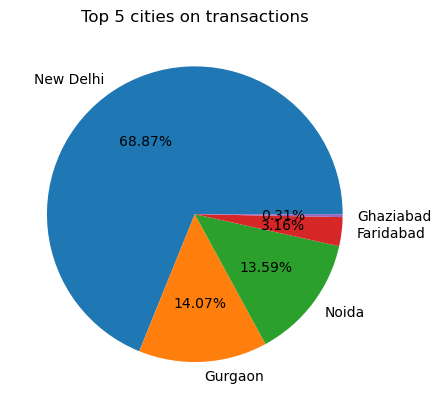

In [50]:
#top 5 cities 
city=df['City'].value_counts()
plt.pie(city.values[:5],labels=city.index[:5],autopct='%1.2f%%');
plt.title('Top 5 cities on transactions');

In India , New Delhi (68.87) records maximum transactions followed by Gurgaon (14.07) and Noida (13.59).

In [14]:
#relationship of ratings
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


C:\Users\Happy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


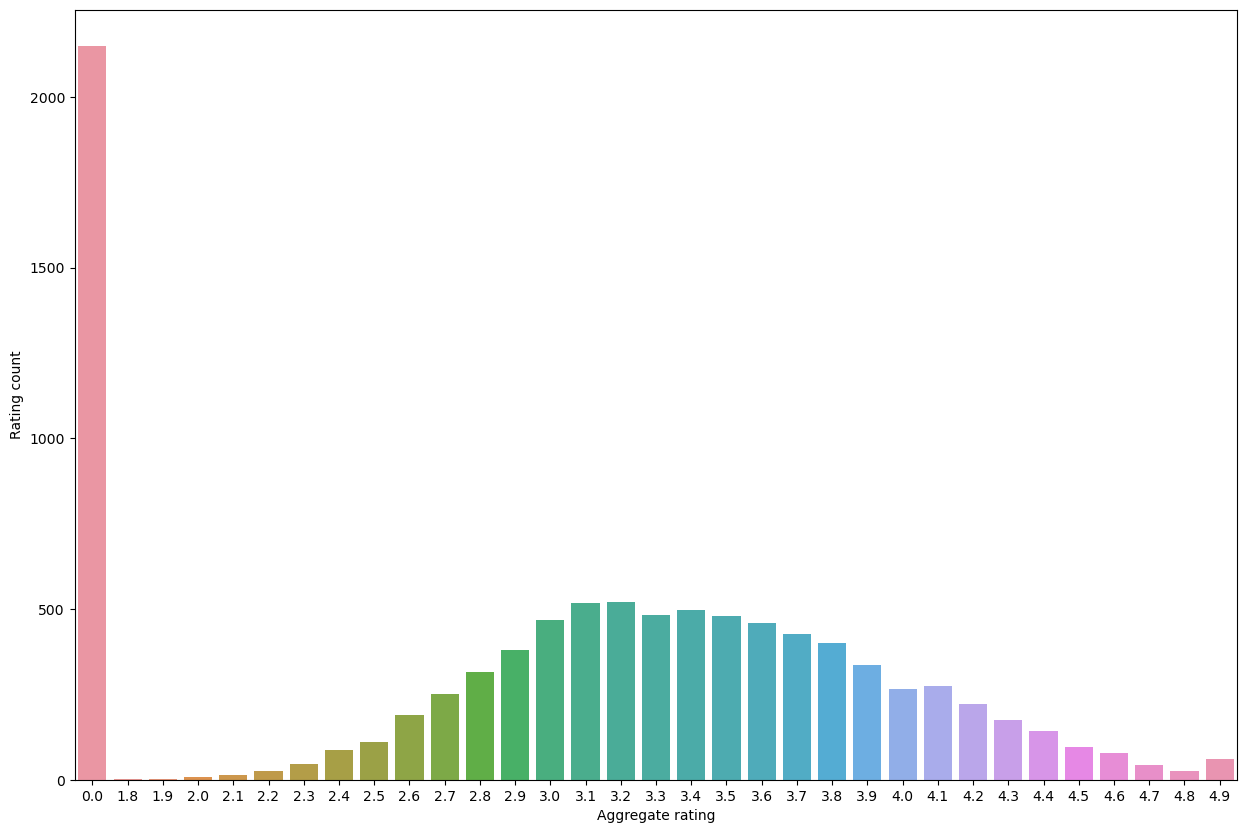

In [15]:
plt.figure(figsize=(15,10));
sns.barplot(rating['Aggregate rating'],rating['Rating count']);

C:\Users\Happy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


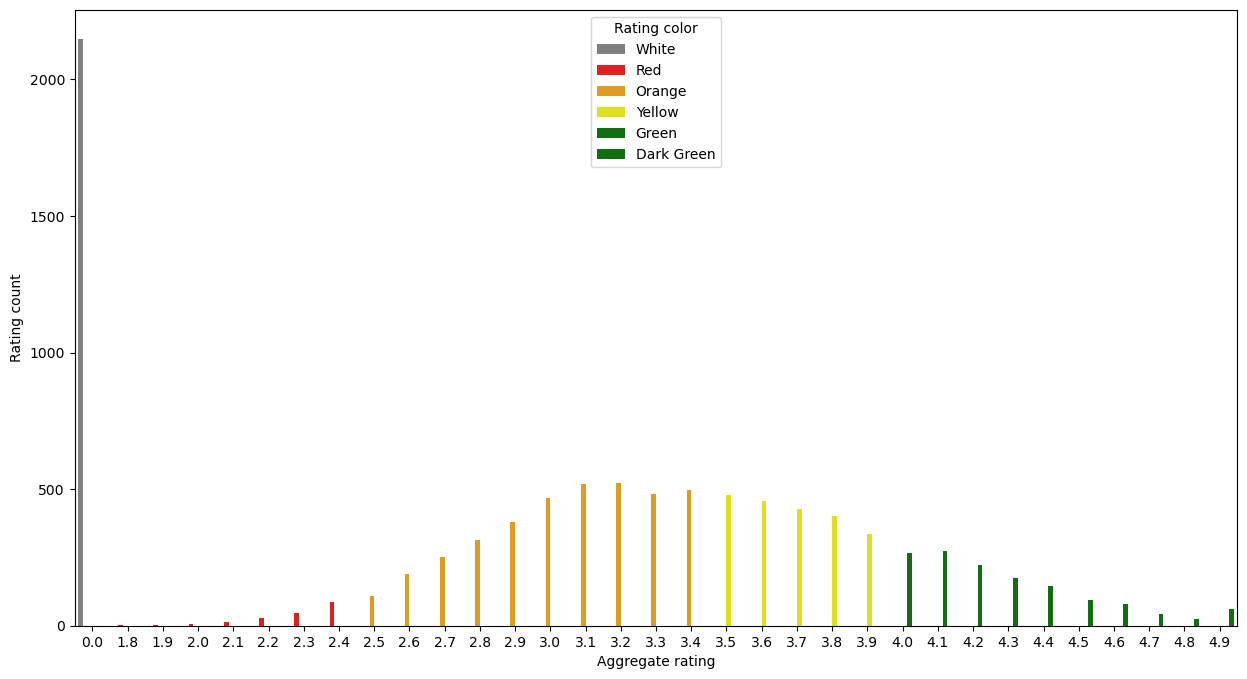

In [19]:
plt.figure(figsize=(15,8));
sns.barplot(rating['Aggregate rating'],rating['Rating count'],hue=rating['Rating color'],palette=['Grey','red','orange','yellow','green','green']);


1.Majority of customers prefered not to rate the restaurants and also no restaurant has got 5-rating.

2.Majority of the customer ratings for restaurants are between 2.8 to 4.1 .

In [21]:
#countries with 0 ratings
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Maximum number of 0 ratings are from Indian customers .

In [25]:
#currencies used 
df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [26]:
#countries with online delivery
df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


1.Only India and UAE offer online deliveries.

2.Only 1/4th of restaurants in India offers online delivery.

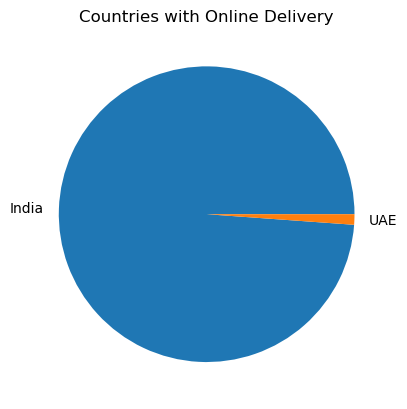

In [39]:
online=df[df['Has Online delivery']=='Yes'].groupby('Country').size()
plt.pie(online,labels=online.index);
plt.title('Countries with Online Delivery');

In [63]:
#Top selling 
cuisine=df['Cuisines'].value_counts().head(25)
cuisine

North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
Cafe                                  299
Bakery                                218
North Indian, Mughlai, Chinese        197
Bakery, Desserts                      170
Street Food                           149
Pizza, Fast Food                      131
Chinese, Fast Food                    118
Mithai, Street Food                   116
South Indian                          112
Bakery, Fast Food                     108
Chinese, North Indian                 105
Mughlai                               103
Ice Cream, Desserts                    83
Ice Cream                              74
North Indian, Fast Food                74
Mithai                                 71
North Indian, Chinese, Mughlai         70
North Indian, Chinese, Fast Food       68
North Indian, Chinese, Continental

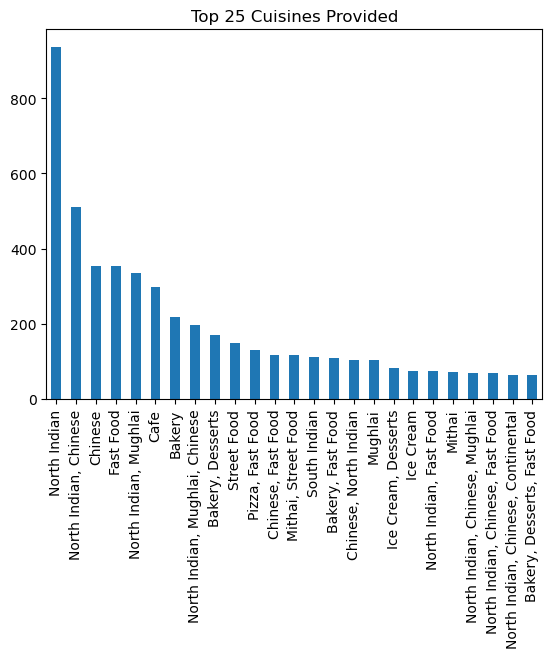

In [68]:
cuisine.plot(kind='bar');
plt.title('Top 25 Cuisines Provided');

1.Most of the restaurants provide North Indian cuisine followed by Chinese,Fastfood and Mughlai cuisines.

2.Cafe and Bakery cuisines are in top 10 Providers

## Key Findings :

    1.Zomato records maximum transactions from India that is 90% and then USA and UK which accounts for 5% combined.
    2.In India , New Delhi (68.87) records maximum transactions followed by Gurgaon (14.07) and Noida (13.59).
    3.Majority of customers prefered not to rate the restaurants. 
    4.Also no restaurant has got 5-rating.
    5.Maximum number of 0 ratings are from Indian customers .
    6.Majority of the customer ratings for restaurants are between 2.8 to 4.1 .
    7.Only India and UAE offer online deliveries.
    8.Only 1/4th of restaurants in India offers online delivery.
    9.Most of the restaurants provide North Indian cuisine followed by Chinese,Fastfood and Mughlai cuisines.
    10.Cafe and Bakery cuisines are in top 10 Providers